In [193]:
import numpy as np
import pandas as pd
import re
import nltk
import ast
import spacy
import textblob
# nltk.download('punkt')
# nltk.download('omw-1.4')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from collections import Counter

#### Reading the CSV

In [190]:
mydata=pd.read_csv('Half_Cleaned.csv')
mydata

,Monument,Username,ReviewTime,Review,Rating,Cleaned Reviews,POS tagged,Lemma,POS Tagged Text,Nouns,Verbatim,Noun
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,4 stars,Nahargarh fort is a very good place to capture...,"[('Nahargarh', 'n'), ('fort', 'n'), ('good', '...",Nahargarh fort good place capture beautiful ...,"[('Nahargarh', 'NNP'), ('fort', 'NN'), ('is', ...","fort, place, view, capital, city, view, fort, ...",Rajasthan completely,"['Nahargarh', 'fort', 'place', 'capture', 'vie..."
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[('Just', 'RB'), ('the', 'DT'), ('place', 'NN'...","place, fort, awesome, city, view, place, album...",NaN,"['place', 'weekend', 'weekdays', 'awesome', 'e..."
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[('Just', 'RB'), ('the', 'DT'), ('place', 'NN'...","place, fort, awesome, night, view, place, albu...",Visited Weekend Wait,"['place', 'weekend', 'weekdays', 'awesome', 'e..."
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,5 stars,Beautiful fort with amazing architecture The v...,"[('Beautiful', 'a'), ('fort', 'n'), ('amazing'...",Beautiful fort amazing architecture view cit...,"[('Beautiful', 'JJ'), ('fort', 'NN'), ('with',...","fort, architecture, city, tour, place, living,...",Walked,"['Beautiful', 'fort', 'architecture', 'view', ..."
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",5 stars,If you are visiting Jaipur this place is one o...,"[('visiting', 'v'), ('Jaipur', 'n'), ('place',...",visit Jaipur place one best destination visi...,"[('If', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","place, whole, fort, view, entry, person, fort,...",absolutely Indians available,"['visit', 'Jaipur', 'place', 'destination', 'v..."
...,...,...,...,...,...,...,...,...,...,...,...,...
125439,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz...",5 stars,Excellent experience perfect weather and amazi...,"[('Excellent', 'a'), ('experience', 'n'), ('pe...",Excellent experience perfect weather amazing...,"[('Excellent', 'JJ'), ('experience', 'NN'), ('...","experience, perfect, weather, side",Defo,"['experience', 'perfect', 'weather', 'view', '..."
125440,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",1 stars,our flight got cancelled hence we couldn t sho...,"[('flight', 'n'), ('got', 'v'), ('cancelled', ...",flight get cancelled hence show visiting Ref...,"[('our', 'PRP$'), ('flight', 'NN'), ('got', 'V...","flight, hence, visiting, case",cancelled Refund,"['flight', 'get', 'hence', 'show', 'Refund', '..."
125441,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t...",5 stars,Well what an experience fantastic views and th...,"[('Well', 'r'), ('experience', 'n'), ('fantast...",Well experience fantastic view service view ...,"[('Well', 'RB'), ('what', 'WP'), ('an', 'DT'),...","experience, service, platform, staff, couldn, ...",Well Brilliant,"['view', 'service', 'view', 'star', 'staff', '..."
125442,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.,5 stars,Beautiful views of London from the shard,"[('Beautiful', 'a'), ('views', 'n'), ('London'...",Beautiful view London shard,"[('Beautiful', 'JJ'), ('views', 'NNS'), ('of',...",shard,London,"['Beautiful', 'vie

#### 1) Cleaning Reviews

In [112]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['Review'].apply(clean)
mydata

,Monument,Username,ReviewTime,Review,Rating,Cleaned Reviews,POS tagged,Lemma,POS Tagged Text,Nouns,Verbatim,Noun
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,4 stars,nahargarh fort is a very good place to capture...,"[('Nahargarh', 'n'), ('fort', 'n'), ('good', '...",Nahargarh fort good place capture beautiful ...,"[('Nahargarh', 'NNP'), ('fort', 'NN'), ('is', ...","fort, place, view, capital, city, view, fort, ...",Rajasthan completely,"['Nahargarh', 'fort', 'place', 'capture', 'vie..."
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,5 stars,just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[('Just', 'RB'), ('the', 'DT'), ('place', 'NN'...","place, fort, awesome, city, view, place, album...",NaN,"['place', 'weekend', 'weekdays', 'awesome', 'e..."
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,5 stars,just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[('Just', 'RB'), ('the', 'DT'), ('place', 'NN'...","place, fort, awesome, night, view, place, albu...",Visited Weekend Wait,"['place', 'weekend', 'weekdays', 'awesome', 'e..."
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,5 stars,beautiful fort with amazing architecture the v...,"[('Beautiful', 'a'), ('fort', 'n'), ('amazing'...",Beautiful fort amazing architecture view cit...,"[('Beautiful', 'JJ'), ('fort', 'NN'), ('with',...","fort, architecture, city, tour, place, living,...",Walked,"['Beautiful', 'fort', 'architecture', 'view', ..."
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",5 stars,if you are visiting jaipur this place is one o...,"[('visiting', 'v'), ('Jaipur', 'n'), ('place',...",visit Jaipur place one best destination visi...,"[('If', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","place, whole, fort, view, entry, person, fort,...",absolutely Indians available,"['visit', 'Jaipur', 'place', 'destination', 'v..."
5,Nahargarh Fort - Jaipur,Yash Bhavsar,7 months ago,Just the place where you want to be on your we...,4 stars,just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[('Just', 'RB'), ('the', 'DT'), ('place', 'NN'...","place, fort, awesome, night, view, place, albu...",NaN,"['place', 'weekend', 'weekdays', 'awesome', 'e..."
6,Nahargarh Fort - Jaipur,kishan gupta,5 months ago,Climb to Nahargarh fort is awesome. Take your ...,5 stars,climb to nahargarh fort is awesome take your t...,"[('Climb', 'n'), ('Nahargarh', 'n'), ('fort', ...",Climb Nahargarh fort awesome Take time climb...,"[('Climb', 'NNP'), ('to', 'TO'), ('Nahargarh',...","fort, time, fort, worth, work, place",Climb,"['Climb', 'Nahargarh', 'fort', 'Take', 'time',..."
7,Nahargarh Fort - Jaipur,Arpit Futela,4 months ago,The place u must visit yeah not so much to see...,4 stars,the place u must visit yeah not so much to see...,"[('place', 'n'), ('u', 'a'), ('must', None), (...",place u must visit yeah much see ur tiny eye...,"[('The', 'DT'), ('place', 'NN'), ('u', 'JJ'), ...","place, yeah, eye, u, city, traffic, time, sunset",Away,"['place', 'see', 'eye', 'capture', 'city', 'Aw..."
8,Nahargarh Fort - Jaipur,Pele Lavan,2 months ago,Stunning!\nWorth walking up from the bottom of...,5 stars,stunning worth walking up from the bottom of t...,"[('Stunning', 'v'), ('Worth', 'n'), ('walking'...",Stunning Worth walk bottom city enjoy city r...,"[('Stunning', 'VBG'), ('Worth', 'NNP'), ('walk...","bottom, city, city, minute, walk, fort, office...",Stunning revile Notice,"['walk', 'city', 'city', 'revile', 'Notice', '..."
9,Nahargarh Fort - Jaipur,Sachin K

In [ ]:
def lower(col):
    return col.lower()
mydata['Cleaned Reviews']=mydata.apply(lambda row: lower(row['Cleaned Reviews']), axis=1)

In [194]:
mydata.dropna(inplace=True)
mydata

,Monument,Username,ReviewTime,Review,Rating,Cleaned Reviews,POS tagged,Lemma
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,4 stars,Nahargarh fort is a very good place to capture...,"[('Nahargarh', 'n'), ('fort', 'n'), ('good', '...",Nahargarh fort good place capture beautiful ...
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,5 stars,Beautiful fort with amazing architecture The v...,"[('Beautiful', 'a'), ('fort', 'n'), ('amazing'...",Beautiful fort amazing architecture view cit...
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",5 stars,If you are visiting Jaipur this place is one o...,"[('visiting', 'v'), ('Jaipur', 'n'), ('place',...",visit Jaipur place one best destination visi...
...,...,...,...,...,...,...,...,...
125439,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz...",5 stars,Excellent experience perfect weather and amazi...,"[('Excellent', 'a'), ('experience', 'n'), ('pe...",Excellent experience perfect weather amazing...
125440,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",1 stars,our flight got cancelled hence we couldn t sho...,"[('flight', 'n'), ('got', 'v'), ('cancelled', ...",flight get cancelled hence show visiting Ref...
125441,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t...",5 stars,Well what an experience fantastic views and th...,"[('Well', 'r'), ('experience', 'n'), ('fantast...",Well experience fantastic view service view ...
125442,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.,5 stars,Beautiful views of London from the shard,"[('Beautiful', 'a'), ('views', 'n'), ('London'...",Beautiful view London shard


In [139]:
mydata.drop(mydata[mydata['Cleaned Reviews']==' '].index, inplace=True)
mydata

,Monument,Username,ReviewTime,Review,Rating,Cleaned Reviews,POS tagged,Lemma
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,4 stars,nahargarh fort is a very good place to capture...,"[('Nahargarh', 'n'), ('fort', 'n'), ('good', '...",Nahargarh fort good place capture beautiful ...
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,5 stars,just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,5 stars,just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,5 stars,beautiful fort with amazing architecture the v...,"[('Beautiful', 'a'), ('fort', 'n'), ('amazing'...",Beautiful fort amazing architecture view cit...
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",5 stars,if you are visiting jaipur this place is one o...,"[('visiting', 'v'), ('Jaipur', 'n'), ('place',...",visit Jaipur place one best destination visi...
...,...,...,...,...,...,...,...,...
125439,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz...",5 stars,excellent experience perfect weather and amazi...,"[('Excellent', 'a'), ('experience', 'n'), ('pe...",Excellent experience perfect weather amazing...
125440,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",1 stars,our flight got cancelled hence we couldn t sho...,"[('flight', 'n'), ('got', 'v'), ('cancelled', ...",flight get cancelled hence show visiting Ref...
125441,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t...",5 stars,well what an experience fantastic views and th...,"[('Well', 'r'), ('experience', 'n'), ('fantast...",Well experience fantastic view service view ...
125442,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.,5 stars,beautiful views of london from the shard,"[('Beautiful', 'a'), ('views', 'n'), ('London'...",Beautiful view London shard


#### 2) Tokenization, 3) Enrichment – POS tagging & 4) Stop words removal

In [195]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
            if word.lower() not in set(stopwords.words('english')):
                    newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist
mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()

In [5]:
mydata['POS tagged'].describe()

count             125444
unique            109584
top       [('top', 'n')]
freq                 283
Name: POS tagged, dtype: object

#### 5) Lemmatization

In [109]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    res = ast.literal_eval(pos_data)
    for word, pos in res:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata

In [196]:
mydata['POS tagged Lemma'] = mydata['Lemma'].apply(token_stop_pos)
mydata.head()

,Monument,Username,ReviewTime,Review,Rating,Cleaned Reviews,POS tagged,Lemma,POS tagged Lemma
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,4 stars,Nahargarh fort is a very good place to capture...,"[('Nahargarh', 'n'), ('fort', 'n'), ('good', '...",Nahargarh fort good place capture beautiful ...,"[(Nahargarh, n), (fort, n), (good, a), (place,..."
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday..."
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday..."
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,5 stars,Beautiful fort with amazing architecture The v...,"[('Beautiful', 'a'), ('fort', 'n'), ('amazing'...",Beautiful fort amazing architecture view cit...,"[(Beautiful, n), (fort, n), (amazing, v), (arc..."
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",5 stars,If you are visiting Jaipur this place is one o...,"[('visiting', 'v'), ('Jaipur', 'n'), ('place',...",visit Jaipur place one best destination visi...,"[(visit, n), (Jaipur, n), (place, n), (one, No..."


In [13]:
mydata['POS tagged Lemma']=mydata['POS tagged Lemma'].astype('object')

#### Noun Removal- Phase I

In [209]:
def RemoveNoun(a):
    res = ast.literal_eval(str(a))
    l=[]
    for key,val in res:
        if val!='n' or key.lower() in ['awesome','beautiful']:
            l.append(key.lower())
    return l
mydata['Lemma without Noun'] = mydata.apply(lambda row: RemoveNoun(row['POS tagged Lemma']), axis=1)

In [210]:
mydata

,Monument,Username,ReviewTime,Review,Rating,Cleaned Reviews,POS tagged,Lemma,POS tagged Lemma,Lemma without Noun
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,4 stars,Nahargarh fort is a very good place to capture...,"[('Nahargarh', 'n'), ('fort', 'n'), ('good', '...",Nahargarh fort good place capture beautiful ...,"[(Nahargarh, n), (fort, n), (good, a), (place,...","[good, beautiful, best, big, require, good, co..."
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday...","[want, fort, super, awesome, get, good, breath..."
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday...","[want, fort, super, awesome, get, good, also, ..."
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,5 stars,Beautiful fort with amazing architecture The v...,"[('Beautiful', 'a'), ('fort', 'n'), ('amazing'...",Beautiful fort amazing architecture view cit...,"[(Beautiful, n), (fort, n), (amazing, v), (arc...","[beautiful, amazing, mesmerize, tour, saw, que..."
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",5 stars,If you are visiting Jaipur this place is one o...,"[('visiting', 'v'), ('Jaipur', 'n'), ('place',...",visit Jaipur place one best destination visi...,"[(visit, n), (Jaipur, n), (place, n), (one, No...","[one, best, whole, absolutely, stunning, per, ..."
...,...,...,...,...,...,...,...,...,...,...
125439,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz...",5 stars,Excellent experience perfect weather and amazi...,"[('Excellent', 'a'), ('experience', 'n'), ('pe...",Excellent experience perfect weather amazing...,"[(Excellent, a), (experience, n), (perfect, n)...","[excellent, amazing, expect, go]"
125440,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",1 stars,our flight got cancelled hence we couldn t sho...,"[('flight', 'n'), ('got', 'v'), ('cancelled', ...",flight get cancelled hence show visiting Ref...,"[(flight, n), (get, n), (cancelled, v), (hence...","[cancelled, visiting, however, apply]"
125441,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t...",5 stars,Well what an experience fantastic views and th...,"[('Well', 'r'), ('experience', 'n'), ('fantast...",Well experience fantastic view service view ...,"[(Well, r), (experience, r), (fantastic, a), (...","[well, experience, fantastic, platform, enough..."
125442,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.,5 stars,Beautiful views of London from the shard,"[('Beautiful', 'a'), ('views', 'n'), ('London'...",Beautiful view London shard,"[(Beautiful, n), (view, n), (London, n), (shar...",[beautiful]


In [211]:
mydata['Lemma without Noun'] = mydata['Lemma without Noun'].astype(str).str.replace(r'\[|\]|,', '')

C:\Users\KARAN\AppData\Local\Temp\ipykernel_7788\486502902.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  mydata['Lemma without Noun'] = mydata['Lemma without Noun'].astype(str).str.replace(r'\[|\]|,', '')


In [212]:
mydata['Lemma without Noun']=mydata['Lemma without Noun'].str.replace("'","")

In [213]:
mydata

,Monument,Username,ReviewTime,Review,Rating,Cleaned Reviews,POS tagged,Lemma,POS tagged Lemma,Lemma without Noun
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,4 stars,Nahargarh fort is a very good place to capture...,"[('Nahargarh', 'n'), ('fort', 'n'), ('good', '...",Nahargarh fort good place capture beautiful ...,"[(Nahargarh, n), (fort, n), (good, a), (place,...",good beautiful best big require good completely
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday...",want fort super awesome get good breathtaking ...
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday...",want fort super awesome get good also find pla...
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,5 stars,Beautiful fort with amazing architecture The v...,"[('Beautiful', 'a'), ('fort', 'n'), ('amazing'...",Beautiful fort amazing architecture view cit...,"[(Beautiful, n), (fort, n), (amazing, v), (arc...",beautiful amazing mesmerize tour saw queen liv...
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",5 stars,If you are visiting Jaipur this place is one o...,"[('visiting', 'v'), ('Jaipur', 'n'), ('place',...",visit Jaipur place one best destination visi...,"[(visit, n), (Jaipur, n), (place, n), (one, No...",one best whole absolutely stunning per fort sm...
...,...,...,...,...,...,...,...,...,...,...
125439,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz...",5 stars,Excellent experience perfect weather and amazi...,"[('Excellent', 'a'), ('experience', 'n'), ('pe...",Excellent experience perfect weather amazing...,"[(Excellent, a), (experience, n), (perfect, n)...",excellent amazing expect go
125440,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",1 stars,our flight got cancelled hence we couldn t sho...,"[('flight', 'n'), ('got', 'v'), ('cancelled', ...",flight get cancelled hence show visiting Ref...,"[(flight, n), (get, n), (cancelled, v), (hence...",cancelled visiting however apply
125441,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t...",5 stars,Well what an experience fantastic views and th...,"[('Well', 'r'), ('experience', 'n'), ('fantast...",Well experience fantastic view service view ...,"[(Well, r), (experience, r), (fantastic, a), (...",well experience fantastic platform enough lift...
125442,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.,5 stars,Beautiful views of London from the shard,"[('Beautiful', 'a'), ('views', 'n'), ('London'...",Beautiful view London shard,"[(Beautiful, n), (view, n), (London, n), (shar...",beautiful


In [216]:
mydata.to_csv("Cleaned_without_dict.csv",index=False)

In [214]:
i1=list(mydata[(mydata['Lemma without Noun'] == '')].index)

In [215]:
mydata.drop(i1)

,Monument,Username,ReviewTime,Review,Rating,Cleaned Reviews,POS tagged,Lemma,POS tagged Lemma,Lemma without Noun
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,4 stars,Nahargarh fort is a very good place to capture...,"[('Nahargarh', 'n'), ('fort', 'n'), ('good', '...",Nahargarh fort good place capture beautiful ...,"[(Nahargarh, n), (fort, n), (good, a), (place,...",good beautiful best big require good completely
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday...",want fort super awesome get good breathtaking ...
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday...",want fort super awesome get good also find pla...
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,5 stars,Beautiful fort with amazing architecture The v...,"[('Beautiful', 'a'), ('fort', 'n'), ('amazing'...",Beautiful fort amazing architecture view cit...,"[(Beautiful, n), (fort, n), (amazing, v), (arc...",beautiful amazing mesmerize tour saw queen liv...
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",5 stars,If you are visiting Jaipur this place is one o...,"[('visiting', 'v'), ('Jaipur', 'n'), ('place',...",visit Jaipur place one best destination visi...,"[(visit, n), (Jaipur, n), (place, n), (one, No...",one best whole absolutely stunning per fort sm...
...,...,...,...,...,...,...,...,...,...,...
125439,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz...",5 stars,Excellent experience perfect weather and amazi...,"[('Excellent', 'a'), ('experience', 'n'), ('pe...",Excellent experience perfect weather amazing...,"[(Excellent, a), (experience, n), (perfect, n)...",excellent amazing expect go
125440,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",1 stars,our flight got cancelled hence we couldn t sho...,"[('flight', 'n'), ('got', 'v'), ('cancelled', ...",flight get cancelled hence show visiting Ref...,"[(flight, n), (get, n), (cancelled, v), (hence...",cancelled visiting however apply
125441,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t...",5 stars,Well what an experience fantastic views and th...,"[('Well', 'r'), ('experience', 'n'), ('fantast...",Well experience fantastic view service view ...,"[(Well, r), (experience, r), (fantastic, a), (...",well experience fantastic platform enough lift...
125442,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.,5 stars,Beautiful views of London from the shard,"[('Beautiful', 'a'), ('views', 'n'), ('London'...",Beautiful view London shard,"[(Beautiful, n), (view, n), (London, n), (shar...",beautiful


##### 6) Custom Dictionary 1: Extra Remaining Nouns

In [238]:
a=pd.DataFrame(mydata['Lemma without Noun'])
a

,Lemma without Noun
0,good beautiful best big require good completely
1,want fort super awesome get good breathtaking ...
2,want fort super awesome get good also find pla...
3,beautiful amazing mesmerize tour saw queen liv...
4,one best whole absolutely stunning per fort sm...
...,...
125439,excellent amazing expect go
125440,cancelled visiting however apply
125441,well experience fantastic platform enough lift...
125442,beautiful


In [240]:
b=pd.DataFrame(Counter(" ".join(a['Lemma without Noun']).split()).most_common(5000))
b.rename(columns={0:'Words',1:'Frequency'},inplace=True)
b

,Words,Frequency
0,beautiful,26555
1,see,22980
2,one,22880
3,go,20950
4,take,16278
...,...,...
4995,curiously,8
4996,delete,8
4997,impatient,8
4998,historycal,8


In [223]:
def stopwords(col):
    global Word_List
    Word_List.append(col)

In [241]:
Word_List=[]
d=b['Words'].apply(stopwords)

In [242]:
nlp = spacy.load("en_core_web_sm")
def noun(wordlist):
    f=[]
    for w in wordlist:
        doc = nlp(w)
        # checking if it is a noun or not
        if(doc[0].tag_ == 'NNP'):
            f.append(doc)
    return f

In [247]:
a=noun(Word_List)

In [287]:
len(a)

462

In [339]:
a1=[28,32,33,39,73,86,90,95,97,109,115,120,126,155,183,187,191,208,210,251,277,282,295,300,304,305,322,332,348,355,356,380,389,393,394]

In [340]:
for i in a1:
    a.pop(i)

In [342]:
len(a)

427

In [348]:
FirstDictionary=[str(i) for i in a]
FirstDictionary

In [351]:
#Removes certain words from string, if present
def multiple_word_remove_func(text, words_2_remove_list):
    
    words_to_remove_list = words_2_remove_list
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word not in words_to_remove_list])
    return text

In [353]:
mydata['First Transform Review'] = mydata.apply(lambda x: multiple_word_remove_func(
                                                x['Lemma without Noun'], FirstDictionary), axis = 1)

In [356]:
mydata.head()

,Monument,Username,ReviewTime,Review,Rating,Cleaned Reviews,POS tagged,Lemma,POS tagged Lemma,Lemma without Noun,First Transform Review
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,4 stars,Nahargarh fort is a very good place to capture...,"[('Nahargarh', 'n'), ('fort', 'n'), ('good', '...",Nahargarh fort good place capture beautiful ...,"[(Nahargarh, n), (fort, n), (good, a), (place,...",good beautiful best big require good completely,good beautiful best big require good completely
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday...",want fort super awesome get good breathtaking ...,want super awesome get good breathtaking also ...
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday...",want fort super awesome get good also find pla...,want super awesome get good also find place su...
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,5 stars,Beautiful fort with amazing architecture The v...,"[('Beautiful', 'a'), ('fort', 'n'), ('amazing'...",Beautiful fort amazing architecture view cit...,"[(Beautiful, n), (fort, n), (amazing, v), (arc...",beautiful amazing mesmerize tour saw queen liv...,beautiful amazing mesmerize tour saw living we...
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",5 stars,If you are visiting Jaipur this place is one o...,"[('visiting', 'v'), ('Jaipur', 'n'), ('place',...",visit Jaipur place one best destination visi...,"[(visit, n), (Jaipur, n), (place, n), (one, No...",one best whole absolutely stunning per fort sm...,one best whole absolutely stunning per small s...


##### 6) Custom Dictionary 2: Most Frequent Meaningless Words

In [357]:
f=pd.DataFrame(mydata['First Transform Review'])
f

,First Transform Review
0,good beautiful best big require good completely
1,want super awesome get good breathtaking also ...
2,want super awesome get good also find place su...
3,beautiful amazing mesmerize tour saw living we...
4,one best whole absolutely stunning per small s...
...,...
125439,excellent amazing expect go
125440,cancelled visiting however apply
125441,well experience fantastic platform enough lift...
125442,beautiful


In [365]:
b1=pd.DataFrame(Counter(" ".join(f['First Transform Review']).split()).most_common(5000))
b1.rename(columns={0:'Words',1:'Frequency'},inplace=True)

In [369]:
pd.set_option('display.max_rows', 2000)
b1.head(2000)

,Words,Frequency
0,beautiful,26555
1,see,22980
2,one,22880
3,go,20950
4,take,16278
5,good,15849
6,also,14803
7,great,13422
8,must,13231
9,get,12591


In [372]:
SecondDictionary=[
            'translated','building','cathedral','de','u','indian',
            'th','n','monument','evening','tower','etc','british','mosque',
            'fountain','russian','km','e','ud','la','hr','museum','en',
            'english','um','elephanta','ft','chapel','masjid','islamic',
            'lucknow','vaporetto','elephant','oh','c','app','es',
            'est','fro','rd','nh','german','h','mi','yellow','pink',
            'r','noon','labyrinth','persian','nehru','romanian','hrs',
            'w','charminar','et','yr','thru','bhulaiya','seagull',
            'ca','mumbai','ta','tajmahal','fish','p','ish','arte',
            'f','ne','ln','si','namaz','govt','tho','din','squirrel',
            'lol','ale','os','v'
           ]

In [373]:
len(SecondDictionary)

81

In [374]:
mydata['Second Transform Review'] = mydata.apply(lambda x: multiple_word_remove_func(
                                            x['First Transform Review'], SecondDictionary), axis = 1)

In [377]:
mydata

,Monument,Username,ReviewTime,Review,Rating,Cleaned Reviews,POS tagged,Lemma,POS tagged Lemma,Lemma without Noun,First Transform Review,Second Transform Review
0,Nahargarh Fort - Jaipur,Jagdeep Laata,a month ago,Nahargarh fort is a very good place to capture...,4 stars,Nahargarh fort is a very good place to capture...,"[('Nahargarh', 'n'), ('fort', 'n'), ('good', '...",Nahargarh fort good place capture beautiful ...,"[(Nahargarh, n), (fort, n), (good, a), (place,...",good beautiful best big require good completely,good beautiful best big require good completely,good beautiful best big require good completely
1,Nahargarh Fort - Jaipur,Anmol,5 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday...",want fort super awesome get good breathtaking ...,want super awesome get good breathtaking also ...,want super awesome get good breathtaking also ...
2,Nahargarh Fort - Jaipur,AJAY MEENA GHUSINGA,7 months ago,Just the place where you want to be on your we...,5 stars,Just the place where you want to be on your we...,"[('place', 'n'), ('want', 'v'), ('weekends', '...",place want weekend weekdays fort super aweso...,"[(place, n), (want, v), (weekend, n), (weekday...",want fort super awesome get good also find pla...,want super awesome get good also find place su...,want super awesome get good also find place su...
3,Nahargarh Fort - Jaipur,MotoHolic Sergey,2 months ago,Beautiful fort with amazing architecture. The ...,5 stars,Beautiful fort with amazing architecture The v...,"[('Beautiful', 'a'), ('fort', 'n'), ('amazing'...",Beautiful fort amazing architecture view cit...,"[(Beautiful, n), (fort, n), (amazing, v), (arc...",beautiful amazing mesmerize tour saw queen liv...,beautiful amazing mesmerize tour saw living we...,beautiful amazing mesmerize tour saw living we...
4,Nahargarh Fort - Jaipur,KIRAN RAJ R,3 months ago,"If you are visiting Jaipur, this place is one ...",5 stars,If you are visiting Jaipur this place is one o...,"[('visiting', 'v'), ('Jaipur', 'n'), ('place',...",visit Jaipur place one best destination visi...,"[(visit, n), (Jaipur, n), (place, n), (one, No...",one best whole absolutely stunning per fort sm...,one best whole absolutely stunning per small s...,one best whole absolutely stunning per small s...
...,...,...,...,...,...,...,...,...,...,...,...,...
125439,"The Shard , London bridge street, london, UK",Ryan Kennett,a year ago,"Excellent experience, perfect weather and amaz...",5 stars,Excellent experience perfect weather and amazi...,"[('Excellent', 'a'), ('experience', 'n'), ('pe...",Excellent experience perfect weather amazing...,"[(Excellent, a), (experience, n), (perfect, n)...",excellent amazing expect go,excellent amazing expect go,excellent amazing expect go
125440,"The Shard , London bridge street, london, UK",David T.,a month ago,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",1 stars,our flight got cancelled hence we couldn t sho...,"[('flight', 'n'), ('got', 'v'), ('cancelled', ...",flight get cancelled hence show visiting Ref...,"[(flight, n), (get, n), (cancelled, v), (hence...",cancelled visiting however apply,cancelled visiting however apply,cancelled visiting however apply
125441,"The Shard , London bridge street, london, UK",Simon Ward,9 months ago,"Well what an experience, fantastic views and t...",5 stars,Well what an experience fantastic views and th...,"[('Well', 'r'), ('experience', 'n'), ('fantast...",Well experience fantastic view service view ...,"[(Well, r), (experience, r), (fantastic, a), (...",well experience fantastic platform enough lift...,well experience fantastic platform enough lift...,well experience fantastic platform enough lift...
125442,"The Shard , London bridge street, london, UK",Sammy Smithurst,3 weeks ago,Beautiful views of London from the shard.,5 sta

In [378]:
mydata.to_csv("Fully_Cleaned.csv",index=False)

# Sentiment Analysis using TextBlob

In [379]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [382]:
fin_data = pd.DataFrame(mydata[['Monument','Rating','Review','Second Transform Review']])

fin_data['Polarity'] = fin_data['Second Transform Review'].apply(getPolarity) 
fin_data['TextBlob Analysis'] = fin_data['Polarity'].apply(analysis)

fin_data

,Monument,Rating,Review,Second Transform Review,Polarity,TextBlob Analysis
0,Nahargarh Fort - Jaipur,4 stars,Nahargarh fort is a very good place to capture...,good beautiful best big require good completely,0.558333,Positive
1,Nahargarh Fort - Jaipur,5 stars,Just the place where you want to be on your we...,want super awesome get good breathtaking also ...,0.588095,Positive
2,Nahargarh Fort - Jaipur,5 stars,Just the place where you want to be on your we...,want super awesome get good also find place su...,0.519444,Positive
3,Nahargarh Fort - Jaipur,5 stars,Beautiful fort with amazing architecture. The ...,beautiful amazing mesmerize tour saw living we...,0.500000,Positive
4,Nahargarh Fort - Jaipur,5 stars,"If you are visiting Jaipur, this place is one ...",one best whole absolutely stunning per small s...,0.266667,Positive
...,...,...,...,...,...,...
125439,"The Shard , London bridge street, london, UK",5 stars,"Excellent experience, perfect weather and amaz...",excellent amazing expect go,0.800000,Positive
125440,"The Shard , London bridge street, london, UK",1 stars,"our flight got cancelled, hence we couldnÃ¢ÂÂ...",cancelled visiting however apply,0.000000,Neutral
125441,"The Shard , London bridge street, london, UK",5 stars,"Well what an experience, fantastic views and t...",well experience fantastic platform enough lift...,0.387500,Positive
125442,"The Shard , London bridge street, london, UK",5 stars,Beautiful views of London from the shard.,beautiful,0.850000,Positive


In [386]:
tb_counts = fin_data['TextBlob Analysis'].value_counts()
tb_counts

Positive    103871
Neutral      15789
Negative      5784
Name: TextBlob Analysis, dtype: int64

# Sentiment Analysis using VADER

In [387]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
fin_data['Vader Sentiment'] = fin_data['Second Transform Review'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,Monument,Rating,Review,Second Transform Review,Polarity,TextBlob Analysis,Vader Sentiment,Vader Analysis
0,Nahargarh Fort - Jaipur,4 stars,Nahargarh fort is a very good place to capture...,good beautiful best big require good completely,0.558333,Positive,0.9313,Positive
1,Nahargarh Fort - Jaipur,5 stars,Just the place where you want to be on your we...,want super awesome get good breathtaking also ...,0.588095,Positive,0.9726,Positive
2,Nahargarh Fort - Jaipur,5 stars,Just the place where you want to be on your we...,want super awesome get good also find place su...,0.519444,Positive,0.9648,Positive
3,Nahargarh Fort - Jaipur,5 stars,Beautiful fort with amazing architecture. The ...,beautiful amazing mesmerize tour saw living we...,0.500000,Positive,0.9287,Positive
4,Nahargarh Fort - Jaipur,5 stars,"If you are visiting Jaipur, this place is one ...",one best whole absolutely stunning per small s...,0.266667,Positive,0.8479,Positive


In [388]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    77001
Neutral     47191
Negative     1252
Name: Vader Analysis, dtype: int64

##### Visual representation of TextBlob & VADER

<AxesSubplot:title={'center':'TextBlob results'}>

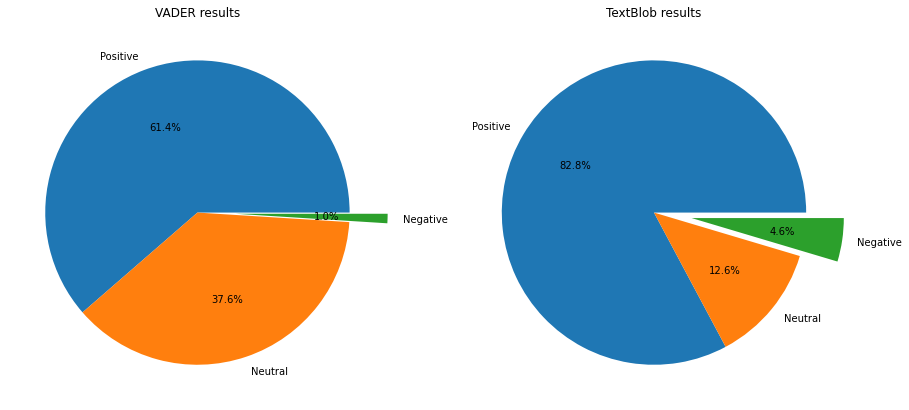

In [394]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,2,2)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,2,1)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,2,2)

In [395]:
fin_data.to_csv("Reviews_With_Scores.csv",index=False)